In [1]:
import os
import allel
import zarr
import pandas as pd
import petl as etl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import plotly.express as px
#import pyfasta
import sys
from os.path import isfile, join, isdir
import dask
# quieten dask warnings about large chunks
dask.config.set(**{'array.slicing.split_large_chunks': True})
import malariagen_data
ag3 = malariagen_data.Ag3("gs://vo_agam_release/")

In [69]:
df_3R = pd.read_csv('/mnt/c/Users/rando/Documenti/Ag1000G/Data/Extras/windows_eqaccess.1000000.3R.txt', sep = '\t')
df_3L = pd.read_csv('/mnt/c/Users/rando/Documenti/Ag1000G/Data/Extras/windows_eqaccess.1000000.3L.txt', sep = '\t')

In [70]:
df_3L

,chrom,start,stop,midpoint,pi_BFcol,pi_CIcol,pi_GHcol,pi_GNcol,pi_MAcol,pi_BFgam,...,theta_GNcol,theta_MAcol,theta_BFgam,theta_GHgam,theta_GNgam,theta_MAgam,theta_GWgam,theta_gcx2,theta_gcx1-GM,theta_gcx1-GW
0,3L,9779,2773591,1391685.0,0.000958,0.001053,0.000994,0.000954,0.001033,0.001196,...,0.001077,0.002674,0.002770,0.001568,0.002838,0.002803,0.001433,0.004051,0.002829,0.003098
1,3L,2773592,4210839,3492216.0,0.001349,0.001413,0.001340,0.001477,0.001370,0.001543,...,0.001705,0.003239,0.003398,0.002150,0.003477,0.003263,0.001953,0.004865,0.003299,0.003821
2,3L,4210840,6216420,5213630.0,0.001291,0.001370,0.001322,0.001294,0.001316,0.001444,...,0.001495,0.003225,0.003315,0.001881,0.003348,0.003238,0.001714,0.004860,0.003263,0.003966
3,3L,6216421,8237501,7226961.0,0.001804,0.001911,0.001830,0.001937,0.001817,0.002025,...,0.002096,0.004692,0.004458,0.002632,0.004484,0.004121,0.002573,0.006427,0.004096,0.005174
4,3L,8237502,10247116,9242309.0,0.002773,0.002827,0.002722,0.002811,0.002825,0.002703,...,0.003164,0.007227,0.006124,0.003916,0.006130,0.005636,0.003589,0.008815,0.005491,0.006965
5,3L,10247117,12103703,11175410.0,0.003189,0.003392,0.003417,0.003364,0.003230,0.003494,...,0.003547,0.007049,0.008995,0.005545,0.008374,0.007628,0.004509,0.009628,0.006262,0.008515
6,3L,12103704,13678807,12891256.0,0.004090,0.003952,0.003908,0.003684,0.004099,0.004222,...,0.004275,0.011143,0.012152,0.007180,0.011357,0.010597,0.005831,0.012458,0.008105,0.010451
7,3L,13678808,15396153,14537480.0,0.004617,0.004521,0.004487,0.004193,0.004641,0.004831,...,0.004552,0.012763,0.015506,0.009002,0.014240,0.013091,0.006691,0.014924,0.008986,0.012008
8,3L,15396154,17150858,16273506.0,0.004576,0.004477,0.004502,0.004190,0.004605,0.004901,...,0.004846,0.012711,0.016803,0.009754,0.015255,0.014093,0.007140,0.014801,0.008821,0.012503
9,3L,17150859,18602688,17876774.0,0.004375,0.004243,0.004237,0.003999,0.004390,0.004673,...,0.004668,0.012714,0.017289,0.009601,0.015722,0.014285,0.006640,0.014805,0.009044,0.012695


In [71]:
new_df_3R = df_3R[((df_3R['start'] > 1000000) & (df_3R['stop'] < 24000000))].drop(columns=(['chrom','start','stop','midpoint']))
new_df_3L = df_3L[((df_3L['start'] > 18000000) & (df_3L['stop'] < 41000000))].drop(columns=(['chrom','start','stop','midpoint']))

In [72]:
frames = [new_df_3R, new_df_3L]
df = pd.concat(frames)

In [76]:
df_pi = df.iloc[:, :13].drop(columns=["pi_GNcol","pi_GWgam"])[order]
df_tjd = df.iloc[:, [13,14,15,16,17,18,19,20,21,22,23,24,25]].drop(columns=["tajima_d_GNcol","tajima_d_GWgam"])[order2]

In [75]:
order = ["pi_BFcol","pi_MAcol","pi_CIcol","pi_GHcol","pi_BFgam","pi_MAgam","pi_GHgam","pi_GNgam","pi_gcx2","pi_gcx1-GM","pi_gcx1-GW"]
order2 = ["tajima_d_BFcol","tajima_d_MAcol","tajima_d_CIcol","tajima_d_GHcol","tajima_d_BFgam","tajima_d_MAgam","tajima_d_GHgam","tajima_d_GNgam","tajima_d_gcx2","tajima_d_gcx1-GM","tajima_d_gcx1-GW"]

In [77]:
df_tjd.head()

,tajima_d_BFcol,tajima_d_MAcol,tajima_d_CIcol,tajima_d_GHcol,tajima_d_BFgam,tajima_d_MAgam,tajima_d_GHgam,tajima_d_GNgam,tajima_d_gcx2,tajima_d_gcx1-GM,tajima_d_gcx1-GW
1,-2.152622,-2.099208,-1.741935,-1.698784,-2.348834,-2.257208,-1.914712,-2.280089,-2.131057,-1.654185,-2.047256
2,-2.201722,-2.148817,-1.802512,-1.748776,-2.372468,-2.263789,-1.908046,-2.296382,-2.185651,-1.758495,-2.110104
3,-2.207069,-2.142729,-1.805811,-1.815235,-2.340440,-2.238053,-1.819616,-2.265278,-2.192012,-1.751923,-2.125090
4,-2.185334,-2.124199,-1.771726,-1.782682,-2.330420,-2.244746,-1.915136,-2.267482,-2.180857,-1.733733,-2.106309
5,-2.171738,-2.113136,-1.728319,-1.746888,-2.320847,-2.231441,-1.923244,-2.259656,-2.156620,-1.705262,-2.081156


In [44]:
df_tjd

,tajima_d_BFcol,tajima_d_CIcol,tajima_d_GHcol,tajima_d_MAcol,tajima_d_BFgam,tajima_d_GHgam,tajima_d_GNgam,tajima_d_MAgam,tajima_d_gcx2,tajima_d_gcx1-GM,tajima_d_gcx1-GW
1,-2.152622,-1.741935,-1.698784,-2.099208,-2.348834,-1.914712,-2.280089,-2.257208,-2.131057,-1.654185,-2.047256
2,-2.201722,-1.802512,-1.748776,-2.148817,-2.372468,-1.908046,-2.296382,-2.263789,-2.185651,-1.758495,-2.110104
3,-2.207069,-1.805811,-1.815235,-2.142729,-2.340440,-1.819616,-2.265278,-2.238053,-2.192012,-1.751923,-2.125090
4,-2.185334,-1.771726,-1.782682,-2.124199,-2.330420,-1.915136,-2.267482,-2.244746,-2.180857,-1.733733,-2.106309
5,-2.171738,-1.728319,-1.746888,-2.113136,-2.320847,-1.923244,-2.259656,-2.231441,-2.156620,-1.705262,-2.081156
6,-2.189885,-1.838744,-1.837090,-2.127422,-2.359559,-1.963324,-2.287809,-2.264320,-2.180335,-1.759892,-2.111352
7,-2.144924,-1.748657,-1.773943,-2.075560,-2.328366,-1.935974,-2.267245,-2.232573,-2.161592,-1.689863,-2.072031
8,-2.148893,-1.681880,-1.760460,-2.087894,-2.317417,-1.917415,-2.258547,-2.222563,-2.134587,-1.656729,-2.022204
9,-2.176391,-1.799498,-1.833771,-2.123654,-2.339622,-1.985907,-2.280910,-2.245977,-2.171736,-1.710905,-2.068788
10,-2.122095,-1.714472,-1.753123,-2.069623,-2.311370,-1.942210,-2.254579,-2.211189,-2.125615,-1.659245,-2.008239


In [78]:
colors = ['red','red','red','red','blue','blue','blue','blue','darkorange','green','limegreen']
labels = ["BFcol (N=135)","MAcol (N=85)","CIcol (N=80)","GHcol (N=63)","BFgam (N=157)","MAgam (N=125)","GHgam (N=36)","GNgam (N=123)","gcx2 (N=197)","gcx1-GM (N=77)","gcx1-GW (N=93)"]

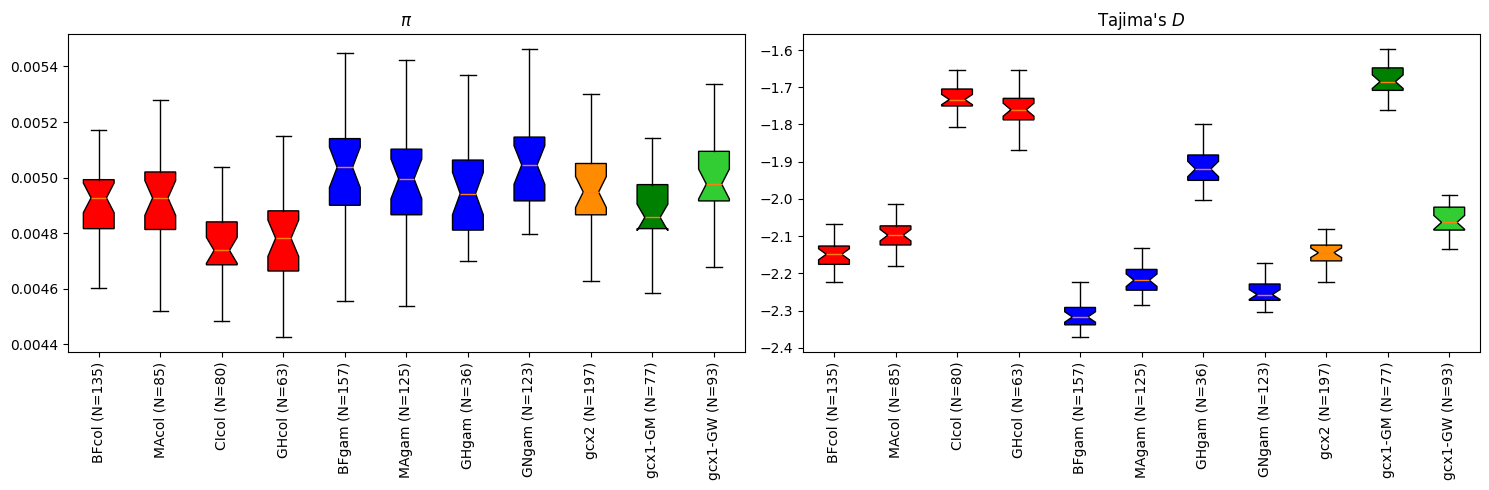

In [83]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

boxplot = ax1.boxplot(df_pi,
                      vert=True,
                      patch_artist=True,
                      showfliers=False,
                      notch=True)  # Add notches
ax1.set_title(r'$\pi$')
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_xticks(range(1, len(labels) + 1))  # Set tick positions
ax1.set_xticklabels(labels, rotation=90)  # Set tick labels

boxplot2 = ax2.boxplot(df_tjd,
                       vert=True,
                       patch_artist=True,
                       showfliers=False,
                       notch=True)  # Add notches
ax2.set_title(r"Tajima's $D$")
for patch, color in zip(boxplot2['boxes'], colors):
    patch.set_facecolor(color)
ax2.set_xticks(range(1, len(labels) + 1))  # Set tick positions
ax2.set_xticklabels(labels, rotation=90)  # Set tick labels

fig.tight_layout()
plt.show()
fig.savefig('stats_pi_tjd.png')


In [61]:
meta = pd.read_excel("/mnt/c/Users/rando/Documenti/Ag1000G/Data/Meta/meta_new_3_0.xlsx", sheet_name=0)
pivot_country_year_taxon = (
    meta
    .pivot_table(
        index=["country"], 
        columns=["pca_country"], 
        values="sample_id",
        aggfunc="count",
        fill_value=0
    )
)
pivot_country_year_taxon#.sort_values(by=['country',"year"])

pca_country,BFcol,BFgam,CIcol,GHcol,GHgam,GNcol,GNgam,GWgam,MAcol,MAgam,gcx1-GM,gcx1-GW,gcx2
country,,,,,,,,,,,,,
Burkina Faso,135,157,0,0,0,0,0,0,0,0,0,0,0
Cote d'Ivoire,0,0,80,0,0,0,0,0,0,0,0,0,0
"Gambia, The",0,0,0,0,0,0,0,0,0,0,77,0,197
Ghana,0,0,0,63,36,0,0,0,0,0,0,0,0
Guinea,0,0,0,0,0,11,123,0,0,0,0,0,0
Guinea-Bissau,0,0,0,0,0,0,0,8,0,0,0,93,0
Mali,0,0,0,0,0,0,0,0,85,125,0,0,0


In [ ]:
labels = ["BFcol (N=135)","CIcol (N=80)","GHcol (N=63)","MAcol (N=85)","BFgam (N=157)","GHgam (N=36)","GNgam (N=123)","MAgam (N=125)","gcx2 (N=197)","gcx1-GM (N=77)","gcx1-GW (N=93)"]

---------------------
## Sandbox

In [26]:
df_stats_gm2 = ag3.diversity_stats(
    cohorts="cohort_admin1_year",
    cohort_size=15,
    region=["3L:18,000,000-41,000,000","3R:1,000,000-24,000,000"],
    site_mask="gamb_colu",
    sample_sets = ["AG1000G-GM-A","AG1000G-GM-B","1323-VO-GM-NGWA-VMF00235","1323-VO-GM-NGWA-VMF00242"],
    sample_query = "taxon == 'gcx1'"
)
df_stats_gm2

Cohort (GM-N_gcx1_2006) has insufficient samples (9) for requested cohort size (15), dropping.
Cohort (GM-W_gcx1_2005) has insufficient samples (1) for requested cohort size (15), dropping.
Cohort (GM-W_gcx1_2019) has insufficient samples (5) for requested cohort size (15), dropping.


Compute SNP allele counts:   0%|          | 0/7650 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/1683 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/2907 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/1683 [00:00<?, ?it/s]

,cohort,theta_pi,theta_pi_estimate,theta_pi_bias,theta_pi_std_err,theta_pi_ci_err,theta_pi_ci_low,theta_pi_ci_upp,theta_w,theta_w_estimate,...,tajima_d_ci_upp,taxon,year,month,country,admin1_iso,admin1_name,admin2_name,longitude,latitude
0,GM-M_gcx1_2019,0.015548,0.015548,-3.489374e-09,0.000108,0.000423,0.015336,0.015760,0.025311,0.025311,...,-1.497412,gcx1,2019,10,"Gambia, The",GM-M,Kuntaur,"[Niani, Nianija]",-14.842966,13.615207
1,GM-N_gcx1_2011,0.015305,0.015305,-3.404673e-09,0.000106,0.000417,0.015097,0.015514,0.023350,0.023350,...,-1.332318,gcx1,2011,"[8, 9, 10]","Gambia, The",GM-N,Kerewan,Central Badibu,-15.900000,13.550000
2,GM-N_gcx1_2019,0.015515,0.015515,-3.477841e-09,0.000105,0.000410,0.015310,0.015720,0.024284,0.024284,...,-1.400308,gcx1,2019,10,"Gambia, The",GM-N,Kerewan,"[Illiasa, Lower Niumi, Sabach Sanjar]",-15.722125,13.493000
3,GM-N_gcx1_2021,0.015373,0.015373,-1.488190e-09,0.000105,0.000412,0.015167,0.015579,0.023610,0.023610,...,-1.351067,gcx1,2021,9,"Gambia, The",GM-N,Kerewan,"[Central Badibu, Illiasa, Lower Niumi]",-15.848053,13.559526


In [27]:
df_stats_gm2.to_csv("diversity_gcx1_cohort.csv")

In [28]:
df_stats_gm2 = pd.read_csv("diversity_gcx1_cohort.csv").drop(columns="Unnamed: 0")
df_stats_gm2

,cohort,theta_pi,theta_pi_estimate,theta_pi_bias,theta_pi_std_err,theta_pi_ci_err,theta_pi_ci_low,theta_pi_ci_upp,theta_w,theta_w_estimate,...,tajima_d_ci_upp,taxon,year,month,country,admin1_iso,admin1_name,admin2_name,longitude,latitude
0,GM-M_gcx1_2019,0.015548,0.015548,-3.489374e-09,0.000108,0.000423,0.015336,0.015760,0.025311,0.025311,...,-1.497412,gcx1,2019,10,"Gambia, The",GM-M,Kuntaur,"['Niani', 'Nianija']",-14.842966,13.615207
1,GM-N_gcx1_2011,0.015305,0.015305,-3.404673e-09,0.000106,0.000417,0.015097,0.015514,0.023350,0.023350,...,-1.332318,gcx1,2011,"[8, 9, 10]","Gambia, The",GM-N,Kerewan,Central Badibu,-15.900000,13.550000
2,GM-N_gcx1_2019,0.015515,0.015515,-3.477841e-09,0.000105,0.000410,0.015310,0.015720,0.024284,0.024284,...,-1.400308,gcx1,2019,10,"Gambia, The",GM-N,Kerewan,"['Illiasa', 'Lower Niumi', 'Sabach Sanjar']",-15.722125,13.493000
3,GM-N_gcx1_2021,0.015373,0.015373,-1.488190e-09,0.000105,0.000412,0.015167,0.015579,0.023610,0.023610,...,-1.351067,gcx1,2021,9,"Gambia, The",GM-N,Kerewan,"['Central Badibu', 'Illiasa', 'Lower Niumi']",-15.848053,13.559526


In [29]:
def plot_diversity_stats(
    df_stats, 
    color=None, 
    height=450, 
    template="plotly_white"
):

    # set up common plotting parameters
    hover_name = "cohort"
    hover_data = [
        "taxon",
        "country",
        "admin1_iso",
        "admin1_name",
        "admin2_name",
        "year",
        "month",
    ]
    labels = {
        'theta_pi_estimate': r'$\widehat{\theta}_{\pi}$',
        'theta_w_estimate': r'$\widehat{\theta}_{w}$',
        'tajima_d_estimate': r'$D$',
        'cohort': "Cohort",
        'taxon': 'Taxon',
        'country': "Country",
    }
    category_orders = {
        "taxon": ["arabiensis", "gambiae", "gcx3", "coluzzii", "gcx1", "gcx2"],
    }
    width = 300 + 30 * len(df_stats)

    # nucleotide diversity bar plot
    fig = px.bar(
        data_frame=df_stats,
        x="cohort",
        y="theta_pi_estimate",
        error_y="theta_pi_ci_err",
        title="Nucleotide diversity",
        color=color,
        height=height,
        width=width,
        hover_name=hover_name,
        hover_data=hover_data,
        labels=labels,
        template=template,
        category_orders=category_orders,
    )
    fig.show()

    # watterson estimator bar plot
    fig = px.bar(
        data_frame=df_stats,
        x="cohort",
        y="theta_w_estimate",
        error_y="theta_w_ci_err",
        title="Watterson estimator",
        color=color,
        height=height,
        width=width,
        hover_name=hover_name,
        hover_data=hover_data,
        labels=labels,
        template=template,
        category_orders=category_orders,
    )
    fig.show()

    # tajima's d bar plot
    fig = px.bar(
        data_frame=df_stats,
        x="cohort",
        y="tajima_d_estimate",
        error_y="tajima_d_ci_err",
        title="Tajima's D",
        color=color,
        height=height,
        width=width,
        hover_name=hover_name,
        hover_data=hover_data,
        labels=labels,
        template=template,
        category_orders=category_orders,
    )
    fig.show()

    # scatter plot comparing diversity estimators
    fig = px.scatter(
        data_frame=df_stats,
        x="theta_pi_estimate",
        y="theta_w_estimate",
        error_x="theta_pi_ci_err",
        error_y="theta_w_ci_err",
        title="Diversity estimators",
        color=color,
        width=500,
        height=500,
        hover_name=hover_name,
        hover_data=hover_data,
        labels=labels,
        template=template,
        category_orders=category_orders,
    )
    fig.show()

In [30]:
    # set up common plotting parameters
hover_name = "cohort"
hover_data = [
        "taxon",
        "country",
        "admin1_iso",
        "admin1_name",
        "admin2_name",
        "year",
        "month",
    ]
labels = {
        'theta_pi_estimate': r'$\widehat{\theta}_{\pi}$',
        'theta_w_estimate': r'$\widehat{\theta}_{w}$',
        'tajima_d_estimate': r'$D$',
        'cohort': "Cohort",
        'taxon': 'Taxon',
        'country': "Country",
    }
category_orders = {
        "cohort": [ 'GM-N_gcx1_2011','GM-N_gcx1_2019','GM-N_gcx1_2021', 'GM-M_gcx1_2019'],
    }
width = 300 + 30 * len(df_stats_gm2)
template="plotly_white"

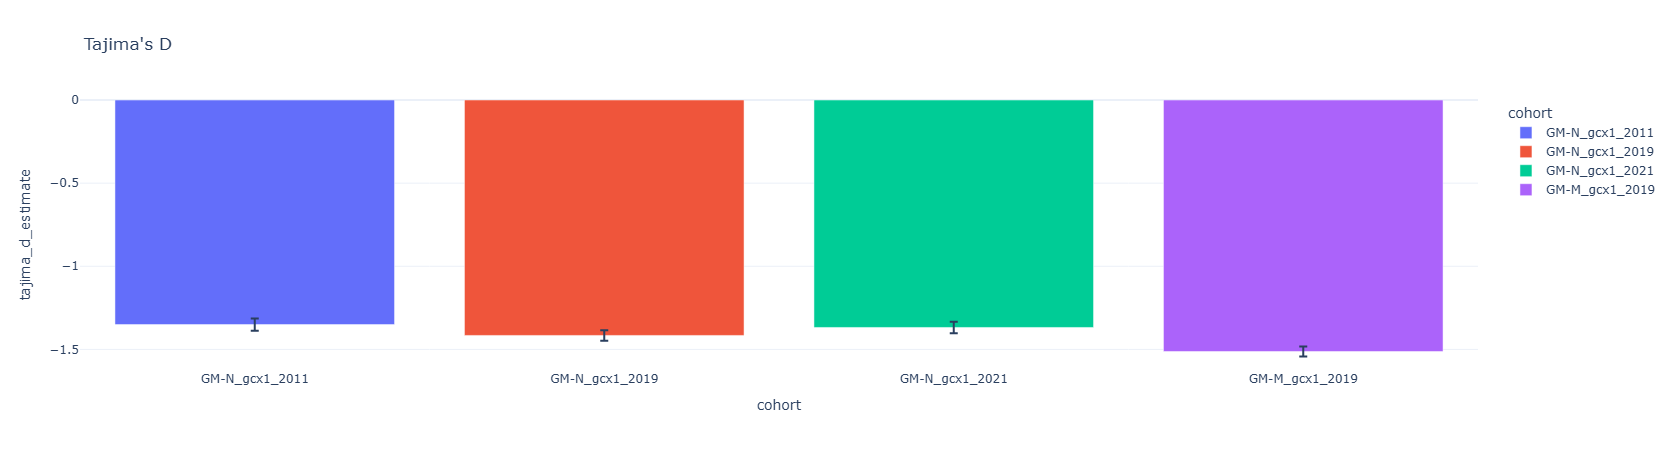

In [32]:
fig = px.bar(
        data_frame=df_stats_gm2,
        x="cohort",
        y="tajima_d_estimate",
        error_y="tajima_d_ci_err",
        title="Tajima's D",
        color="cohort",
        height=450,
        width=500,
        hover_name=hover_name,
        hover_data=hover_data,
        #labels={'tajima_d_estimate':r'$D$'},
        template=template,
        category_orders=category_orders,
    )
fig.write_image('tajima_gcx1.png', scale=2)
fig.show()

In [33]:
order = ['GM-N_gcx1_2011','GM-N_gcx1_2019','GM-N_gcx1_2021', 'GM-M_gcx1_2019']

-----------------------

In [35]:
df_stats_gm2 = ag3.diversity_stats(
    cohorts="cohort_admin1_year",
    cohort_size=15,
    region=["3L:18,000,000-41,000,000","3R:1,000,000-24,000,000"],
    site_mask="gamb_colu",
    sample_sets = ["AG1000G-GM-A","AG1000G-GM-B","1323-VO-GM-NGWA-VMF00235","1323-VO-GM-NGWA-VMF00242","AG1000G-GW","AG1000G-BF-B"],
    sample_query = "taxon == ['gcx1','coluzzii','gambiae']"
)
df_stats_gm2

Cohort (GM-L_colu_2005) has insufficient samples (4) for requested cohort size (15), dropping.
Cohort (GM-M_colu_2021) has insufficient samples (5) for requested cohort size (15), dropping.
Cohort (GM-N_colu_2006) has insufficient samples (3) for requested cohort size (15), dropping.
Cohort (GM-N_colu_2011) has insufficient samples (6) for requested cohort size (15), dropping.
Cohort (GM-N_colu_2021) has insufficient samples (4) for requested cohort size (15), dropping.
Cohort (GM-N_gcx1_2006) has insufficient samples (9) for requested cohort size (15), dropping.
Cohort (GM-U_gamb_2019) has insufficient samples (14) for requested cohort size (15), dropping.
Cohort (GM-W_colu_2005) has insufficient samples (14) for requested cohort size (15), dropping.
Cohort (GM-W_colu_2019) has insufficient samples (3) for requested cohort size (15), dropping.
Cohort (GM-W_gamb_2019) has insufficient samples (2) for requested cohort size (15), dropping.
Cohort (GM-W_gcx1_2005) has insufficient samples

Compute SNP allele counts:   0%|          | 0/1683 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/1683 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/918 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/6273 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/6273 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/7650 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/2295 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/1683 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/2907 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/1683 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/5049 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/1683 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/918 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/2295 [00:00<?, ?it/s]

,cohort,theta_pi,theta_pi_estimate,theta_pi_bias,theta_pi_std_err,theta_pi_ci_err,theta_pi_ci_low,theta_pi_ci_upp,theta_w,theta_w_estimate,...,tajima_d_ci_upp,taxon,year,month,country,admin1_iso,admin1_name,admin2_name,longitude,latitude
0,BF-09_colu_2014,0.015326,0.015326,-3.411990e-09,0.000104,0.000408,0.015122,0.015530,0.025669,0.025669,...,-1.567596,coluzzii,2014,7,Burkina Faso,BF-09,Hauts-Bassins,Houet,-4.445170,11.233566
1,BF-09_gamb_2014,0.015607,0.015607,-3.509818e-09,0.000112,0.000438,0.015387,0.015826,0.027311,0.027311,...,-1.667693,gambiae,2014,7,Burkina Faso,BF-09,Hauts-Bassins,Houet,-4.312283,11.206109
2,GM-L_colu_2006,0.015660,0.015660,2.157734e-09,0.000109,0.000426,0.015447,0.015873,0.026341,0.026341,...,-1.577831,coluzzii,2006,8,"Gambia, The",GM-L,Mansakonko,Kiang West,-16.033000,13.417000
3,GM-M_colu_2019,0.015821,0.015821,-5.524754e-09,0.000106,0.000417,0.015613,0.016029,0.026870,0.026870,...,-1.599908,coluzzii,2019,"[8, 10]","Gambia, The",GM-M,"[Janjanbureh, Kuntaur]","[Niamina East, Niani, Nianija, Sami]",-14.862410,13.615204
4,GM-M_gamb_2019,0.015986,0.015986,-5.582259e-09,0.000112,0.000440,0.015766,0.016206,0.028624,0.028624,...,-1.719703,gambiae,2019,"[8, 10]","Gambia, The",GM-M,Kuntaur,"[Niani, Nianija, Sami]",-14.851500,13.620062
5,GM-M_gcx1_2019,0.015548,0.015548,-3.489374e-09,0.000108,0.000423,0.015336,0.015760,0.025311,0.025311,...,-1.497412,gcx1,2019,10,"Gambia, The",GM-M,Kuntaur,"[Niani, Nianija]",-14.842966,13.615207
6,GM-N_colu_2019,0.015553,0.015553,-3.491079e-09,0.000107,0.000421,0.015342,0.015764,0.025924,0.025924,...,-1.555615,coluzzii,2019,10,"Gambia, The",GM-N,Kerewan,"[Illiasa, Lower Niumi, Sabach Sanjar]",-15.694944,13.493556
7,GM-N_gcx1_2011,0.015305,0.015305,-3.404673e-09,0.000106,0.000417,0.015097,0.015514,0.023350,0.023350,...,-1.332318,gcx1,2011,"[8, 9, 10]","Gambia, The",GM-N,Kerewan,Central Badibu,-15.900000,13.550000
8,GM-N_gcx1_2019,0.015515,0.015515,-3.477841e-09,0.000105,0.000410,0.015310,0.015720,0.024284,0.024284,...,-1.400308,gcx1,2019,10,"Gambia, The",GM-N,Kerewan,"[Illiasa, Lower Niumi, Sabach Sanjar]",-15.722125,13.493000
9,GM-N_gcx1_2021,0.015373,0.015373,-1.488190e-09,0.000105,0.000412,0.015167,0.015579,0.023610,0.023610,...,-1.351067,gcx1,2021,9,"Gambia, The",GM-N,Kerewan,"[Central Badibu, Illiasa, Lower Niumi]",-15.848053,13.559526


In [36]:
#df_stats_gm2.to_csv("diversity_gcx1_cohort_2.csv")

In [38]:
df_stats_gm2.cohort.unique()

array(['BF-09_colu_2014', 'BF-09_gamb_2014', 'GM-L_colu_2006',
       'GM-M_colu_2019', 'GM-M_gamb_2019', 'GM-M_gcx1_2019',
       'GM-N_colu_2019', 'GM-N_gcx1_2011', 'GM-N_gcx1_2019',
       'GM-N_gcx1_2021', 'GM-U_colu_2019', 'GM-U_colu_2021',
       'GW-BM_gcx1_2010', 'GW-BS_gcx1_2010'], dtype=object)

In [80]:
category_orders = {
        "cohort": [ 'BF-09_colu_2014','BF-09_gamb_2014','GM-N_gcx1_2011', 'GM-N_gcx1_2019','GM-N_gcx1_2021','GM-M_gcx1_2019'],
    }

In [81]:
set_ = ['BF-09_colu_2014','BF-09_gamb_2014','GM-N_gcx1_2011', 'GM-N_gcx1_2019','GM-N_gcx1_2021','GM-M_gcx1_2019']
subset_df = df_stats_gm2[df_stats_gm2['cohort'].isin(set_)]

In [82]:
subset_df

,cohort,theta_pi,theta_pi_estimate,theta_pi_bias,theta_pi_std_err,theta_pi_ci_err,theta_pi_ci_low,theta_pi_ci_upp,theta_w,theta_w_estimate,...,tajima_d_ci_upp,taxon,year,month,country,admin1_iso,admin1_name,admin2_name,longitude,latitude
0,BF-09_colu_2014,0.015326,0.015326,-3.411990e-09,0.000104,0.000408,0.015122,0.015530,0.025669,0.025669,...,-1.567596,coluzzii,2014,7,Burkina Faso,BF-09,Hauts-Bassins,Houet,-4.445170,11.233566
1,BF-09_gamb_2014,0.015607,0.015607,-3.509818e-09,0.000112,0.000438,0.015387,0.015826,0.027311,0.027311,...,-1.667693,gambiae,2014,7,Burkina Faso,BF-09,Hauts-Bassins,Houet,-4.312283,11.206109
5,GM-M_gcx1_2019,0.015548,0.015548,-3.489374e-09,0.000108,0.000423,0.015336,0.015760,0.025311,0.025311,...,-1.497412,gcx1,2019,10,"Gambia, The",GM-M,Kuntaur,"[Niani, Nianija]",-14.842966,13.615207
7,GM-N_gcx1_2011,0.015305,0.015305,-3.404673e-09,0.000106,0.000417,0.015097,0.015514,0.023350,0.023350,...,-1.332318,gcx1,2011,"[8, 9, 10]","Gambia, The",GM-N,Kerewan,Central Badibu,-15.900000,13.550000
8,GM-N_gcx1_2019,0.015515,0.015515,-3.477841e-09,0.000105,0.000410,0.015310,0.015720,0.024284,0.024284,...,-1.400308,gcx1,2019,10,"Gambia, The",GM-N,Kerewan,"[Illiasa, Lower Niumi, Sabach Sanjar]",-15.722125,13.493000
9,GM-N_gcx1_2021,0.015373,0.015373,-1.488190e-09,0.000105,0.000412,0.015167,0.015579,0.023610,0.023610,...,-1.351067,gcx1,2021,9,"Gambia, The",GM-N,Kerewan,"[Central Badibu, Illiasa, Lower Niumi]",-15.848053,13.559526


In [83]:
subset_df.cohort.unique()

array(['BF-09_colu_2014', 'BF-09_gamb_2014', 'GM-M_gcx1_2019',
       'GM-N_gcx1_2011', 'GM-N_gcx1_2019', 'GM-N_gcx1_2021'], dtype=object)

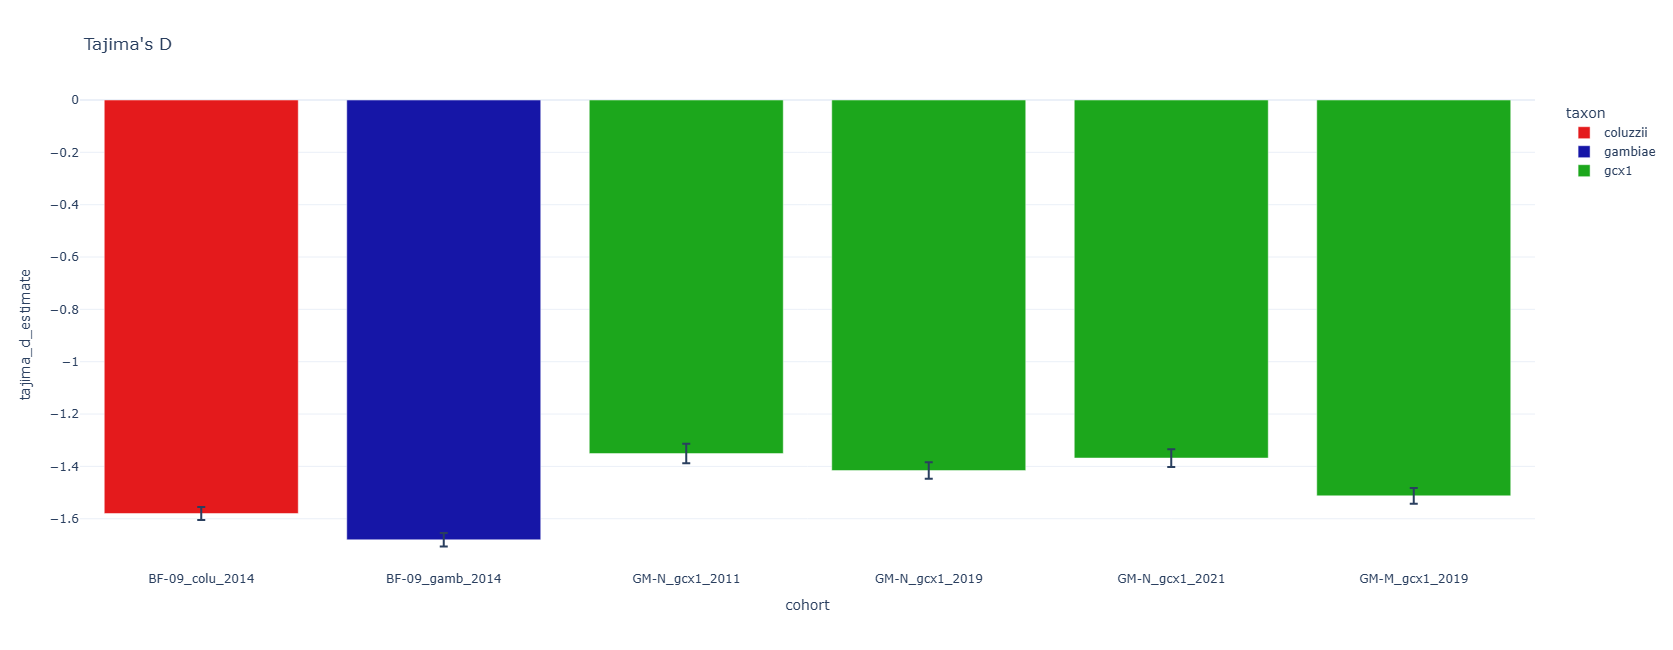

In [105]:
fig = px.bar(
        data_frame=subset_df,
        x="cohort",
        y="tajima_d_estimate",
        error_y="tajima_d_ci_err",
        title="Tajima's D",
        color="taxon",
    color_discrete_map=species_color_map,
        height=650,
        width=800,
        hover_name=hover_name,
        hover_data=hover_data,
        #labels={'tajima_d_estimate':r'$D$'},
        template=template,
        category_orders=category_orders,
    )
fig.write_image('tajima_gcx1_both.png', scale=2)
fig.show()

In [101]:
species_palette = px.colors.qualitative.Dark24
species_palette2 = px.colors.qualitative.Pastel1
species_palette3 = px.colors.qualitative.Set1
species_color_map = {
    'gambiae':  species_palette[19],
    'coluzzii': species_palette3[0],
    'gcx1': species_palette[2],
}

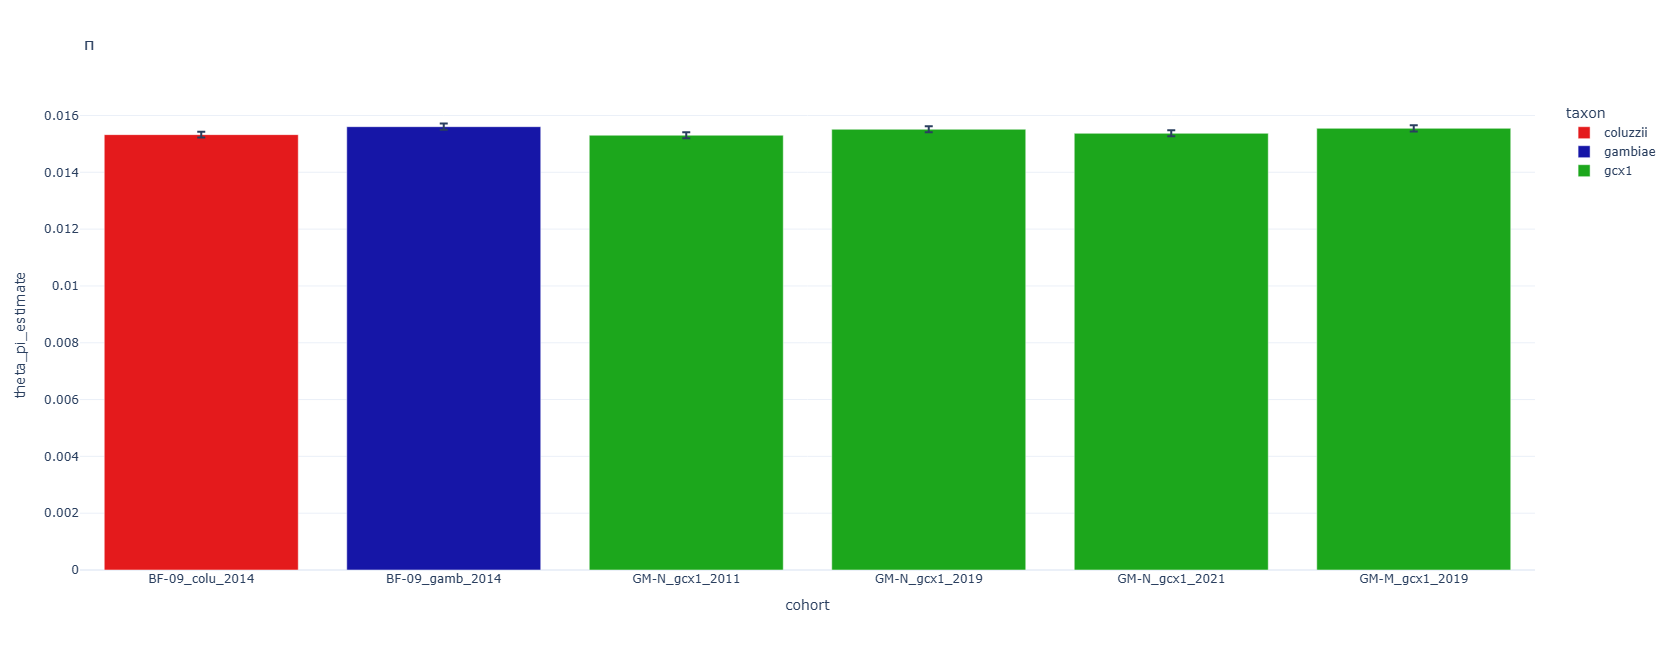

In [103]:
fig = px.bar(
        data_frame=subset_df,
        x="cohort",
        y="theta_pi_estimate",
        error_y="theta_pi_std_err",
        title="π",
        color="taxon",
    color_discrete_map=species_color_map,
        height=650,
        width=800,
        hover_name=hover_name,
        hover_data=hover_data,
        #labels={'theta_pi_std_err':r'$\widehat{\theta}_{\pi}$'},
        template=template,
        category_orders=category_orders,
    )
#fig.update_layout(yaxis_range=[0, 0.016])
#fig.update_layout(xaxis_title="Cohort", yaxis_title='$π$')
fig.write_image('pi_gcx1.png', scale=2)
fig.show()

In [90]:
subset_df[["cohort","theta_pi_estimate"]]

,cohort,theta_pi_estimate
0,BF-09_colu_2014,0.015326
1,BF-09_gamb_2014,0.015607
5,GM-M_gcx1_2019,0.015548
7,GM-N_gcx1_2011,0.015305
8,GM-N_gcx1_2019,0.015515
9,GM-N_gcx1_2021,0.015373


-----------------------------------

In [11]:
subpops = 'BF_coluzzii', 'BF_gambiae', 'CI_coluzzii','GH_coluzzii', 'GH_gambiae','GM_coluzzii','GM_gcx1', 'GN_gambiae', 'GW_gcx1', 'MA_coluzzii','MA_gambiae'

In [12]:
fn_template = 'windows_eqaccess.{window}.{chrom}.txt'

def build_df(chrom, window='1000000'):

    # pi
    pi_fn = '/mnt/c/Users/rando/Documenti/Ag1000G/Data/Extras/pi.windows_eqaccess2.h5'
    pi = h5py.File(pi_fn, mode='r')

    # tajima's D
    tjd_fn = '/mnt/c/Users/rando/Documenti/Ag1000G/Data/Extras/Tajimas_D.windows_eqaccess2.h5'
    tjd = h5py.File(tjd_fn, mode='r')

    # theta
    tht_fn = '/mnt/c/Users/rando/Documenti/Ag1000G/Data/Extras/theta.windows_eqaccess2.h5'
    tht = h5py.File(tht_fn, mode='r')

    pops = subpops
    
    pig = pi[window][chrom]['BF_coluzzii']
    # N.B., previous data includes final odd-size window, remove here
    windows = pig['windows'][:-1]
    starts = windows[:, 0]
    stops = windows[:, 1]
    midpoints = np.round(windows.mean(axis=1))
    items = [
        ('chrom', [chrom] * len(starts)),
        ('start', starts),
        ('stop', stops),
        ('midpoint', midpoints),
    ]
    
    for pop in pops:
        x = pi[window][chrom][pop]['pi'][:-1]
        items.append(('pi_' + pop, x))

    for pop in pops:
        y = tjd[window][chrom][pop]['tajd'][:-1]
        items.append(('tajima_d_' + pop, y))
        
    for pop in pops:
        y = tht[window][chrom][pop]['theta'][:-1]
        items.append(('theta_' + pop, y))


    df = pd.DataFrame.from_dict(dict(items))

    fn = fn_template.format(window=window, chrom=chrom)
    df.to_csv(fn, sep='\t', index=False)
    
    return df

In [13]:
df = build_df('3L')
df = build_df('3R')

In [40]:
df_3R = pd.read_csv('windows_eqaccess.1000000.3R.txt', sep = '\t')
df_3L = pd.read_csv('windows_eqaccess.1000000.3L.txt', sep = '\t')

In [41]:
new_df_3R = df_3R[((df_3R['start'] > 1000000) & (df_3R['stop'] < 24000000))].drop(columns=(['chrom','start','stop','midpoint']))
new_df_3L = df_3L[((df_3L['start'] > 18000000) & (df_3L['stop'] < 41000000))].drop(columns=(['chrom','start','stop','midpoint']))

In [42]:
frames = [new_df_3R, new_df_3L]
df = pd.concat(frames)

In [43]:
df.head()

,pi_BF_coluzzii,pi_BF_gambiae,pi_CI_coluzzii,pi_GH_coluzzii,pi_GH_gambiae,pi_GM_coluzzii,pi_GM_gcx1,pi_GN_gambiae,pi_GW_gcx1,pi_MA_coluzzii,...,theta_BF_gambiae,theta_CI_coluzzii,theta_GH_coluzzii,theta_GH_gambiae,theta_GM_coluzzii,theta_GM_gcx1,theta_GN_gambiae,theta_GW_gcx1,theta_MA_coluzzii,theta_MA_gambiae
1,0.004618,0.004762,0.004509,0.004499,0.004722,0.004670,0.004640,0.004762,0.004871,0.004670,...,0.011002,0.008264,0.008249,0.009781,0.009643,0.008374,0.010727,0.009670,0.009753,0.010581
2,0.003878,0.003958,0.003802,0.003736,0.003905,0.003890,0.003892,0.003933,0.003939,0.003932,...,0.009035,0.007062,0.006761,0.008038,0.008106,0.007266,0.008698,0.008079,0.008330,0.008719
3,0.004497,0.004521,0.004422,0.004416,0.004414,0.004489,0.004442,0.004485,0.004567,0.004507,...,0.010072,0.008272,0.008548,0.008774,0.009683,0.008230,0.009839,0.009530,0.009639,0.009855
4,0.004617,0.004744,0.004484,0.004469,0.004679,0.004605,0.004595,0.004740,0.004676,0.004693,...,0.010853,0.008293,0.008498,0.009800,0.009842,0.008599,0.010588,0.009736,0.009932,0.010519
5,0.004939,0.005002,0.004776,0.004778,0.004942,0.004909,0.004849,0.005010,0.004943,0.004955,...,0.011333,0.008787,0.008807,0.010492,0.010489,0.009018,0.011299,0.010238,0.010662,0.011165


In [44]:
order = ["pi_BF_coluzzii","pi_MA_coluzzii","pi_CI_coluzzii","pi_GH_coluzzii","pi_BF_gambiae","pi_MA_gambiae","pi_GH_gambiae","pi_GN_gambiae","pi_GM_coluzzii","pi_GW_gcx1","pi_GM_gcx1"]
order2 = ["tajima_d_BF_coluzzii","tajima_d_MA_coluzzii","tajima_d_CI_coluzzii","tajima_d_GH_coluzzii","tajima_d_BF_gambiae","tajima_d_MA_gambiae","tajima_d_GH_gambiae","tajima_d_GN_gambiae","tajima_d_GM_coluzzii","tajima_d_GW_gcx1","tajima_d_GM_gcx1"]
order3 = ["theta_BF_coluzzii","theta_MA_coluzzii","theta_CI_coluzzii","theta_GH_coluzzii","theta_BF_gambiae","theta_MA_gambiae","theta_GH_gambiae","theta_GN_gambiae","theta_GM_coluzzii","theta_GM_gcx1","theta_GW_gcx1"]

In [48]:
df_pi = df.iloc[:, :11][order]
df_tjd = df.iloc[:, 11:22][order2]
df_theta =  df.iloc[:, 22:][order3]
df_theta.head()

,theta_BF_coluzzii,theta_MA_coluzzii,theta_CI_coluzzii,theta_GH_coluzzii,theta_BF_gambiae,theta_MA_gambiae,theta_GH_gambiae,theta_GN_gambiae,theta_GM_coluzzii,theta_GM_gcx1,theta_GW_gcx1
1,0.009698,0.009753,0.008264,0.008249,0.011002,0.010581,0.009781,0.010727,0.009643,0.008374,0.009670
2,0.008275,0.008330,0.007062,0.006761,0.009035,0.008719,0.008038,0.008698,0.008106,0.007266,0.008079
3,0.009777,0.009639,0.008272,0.008548,0.010072,0.009855,0.008774,0.009839,0.009683,0.008230,0.009530
4,0.009972,0.009932,0.008293,0.008498,0.010853,0.010519,0.009800,0.010588,0.009842,0.008599,0.009736
5,0.010690,0.010662,0.008787,0.008807,0.011333,0.011165,0.010492,0.011299,0.010489,0.009018,0.010238


In [11]:
colors = ['red','red','red','red','blue','blue','blue','blue','darkorange','green','limegreen']
labels = ["BFcol","MAcol","CIcol","GHcol","BFgam","MAgam","GHgam","GNgam","gcx2","gcx1-GM","gcx1-GW"]

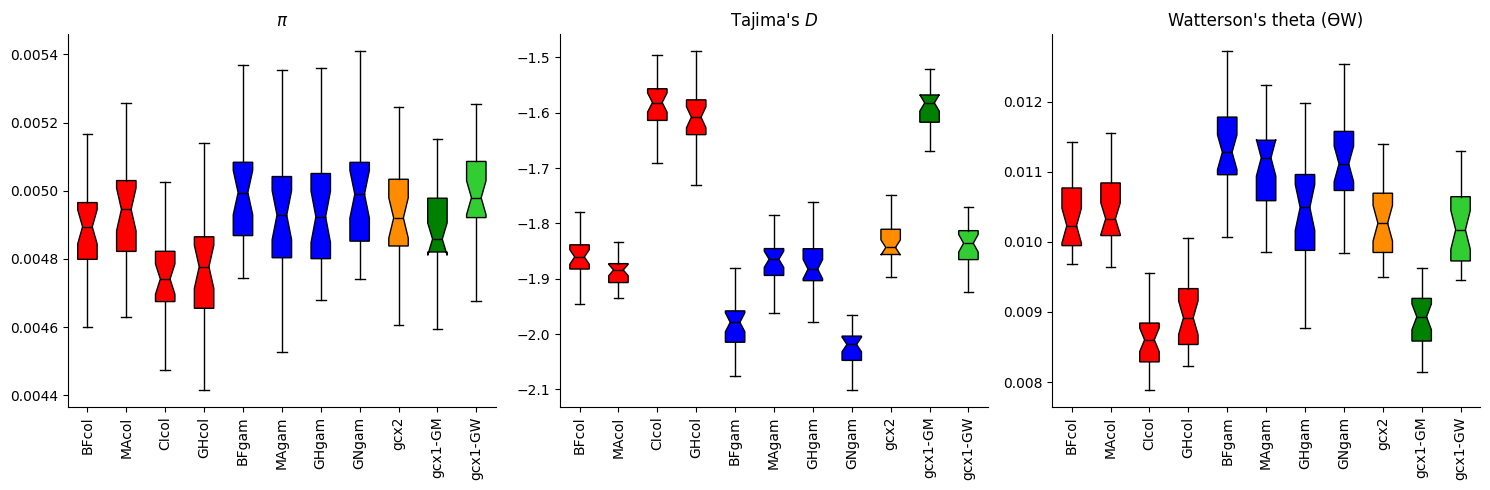

In [56]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

boxplot = ax1.boxplot(df_pi,
                      vert=True,
                      patch_artist=True,
                      showfliers=False,
                      medianprops={"color": "black"},
                      notch=True)  # Add notches
ax1.set_title(r'$\pi$')
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_xticks(range(1, len(labels) + 1))  # Set tick positions
ax1.set_xticklabels(labels, rotation=90)  # Set tick labels

boxplot2 = ax2.boxplot(df_tjd,
                       vert=True,
                       patch_artist=True,
                       showfliers=False,
                      medianprops={"color": "black"},
                       notch=True)  # Add notches
ax2.set_title(r"Tajima's $D$")
for patch, color in zip(boxplot2['boxes'], colors):
    patch.set_facecolor(color)
ax2.set_xticks(range(1, len(labels) + 1))  # Set tick positions
ax2.set_xticklabels(labels, rotation=90)  # Set tick labels

boxplot3 = ax3.boxplot(df_theta,
                       vert=True,
                       patch_artist=True,
                       showfliers=False,
                       notch=True,
                      medianprops={"color": "black"}) 
ax3.set_title(r"Watterson's theta (ƟW)")
for patch, color in zip(boxplot3['boxes'], colors):
    patch.set_facecolor(color)
ax3.set_xticks(range(1, len(labels) + 1))  # Set tick positions
ax3.set_xticklabels(labels, rotation=90)  # Set tick labels

fig.tight_layout()
sns.despine()
plt.show()
fig.savefig('stats_pi_tjd.png')


-------------------------

In [1]:
import os
import allel
import zarr
import pandas as pd
import petl as etl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import plotly.express as px
#import pyfasta
import sys
from os.path import isfile, join, isdir
import dask
# quieten dask warnings about large chunks
dask.config.set(**{'array.slicing.split_large_chunks': True})
import malariagen_data
ag3 = malariagen_data.Ag3("gs://vo_agam_release/")

In [ ]:
 'gcx1-GM'
 'gcx1-GW':


In [2]:
subpops = 'gcx1_VMF00235','gcx1_VMF00242'

In [5]:
fn_template = 'windows_eqaccess.{window}.{chrom}.txt'

def build_df(chrom, window='1000000'):

    # pi
    pi_fn = '/mnt/c/Users/rando/Documenti/Ag1000G/Data/Extras/pi.windows_eqaccess.h5'
    pi = h5py.File(pi_fn, mode='r')

    # tajima's D
    tjd_fn = '/mnt/c/Users/rando/Documenti/Ag1000G/Data/Extras/Tajimas_D.windows_eqaccess.h5'
    tjd = h5py.File(tjd_fn, mode='r')



    pops = subpops
    
    pig = pi[window][chrom]['gcx1_VMF00235']
    # N.B., previous data includes final odd-size window, remove here
    windows = pig['windows'][:-1]
    starts = windows[:, 0]
    stops = windows[:, 1]
    midpoints = np.round(windows.mean(axis=1))
    items = [
        ('chrom', [chrom] * len(starts)),
        ('start', starts),
        ('stop', stops),
        ('midpoint', midpoints),
    ]
    
    for pop in pops:
        x = pi[window][chrom][pop]['pi'][:-1]
        items.append(('pi_' + pop, x))

    for pop in pops:
        y = tjd[window][chrom][pop]['tajd'][:-1]
        items.append(('tajima_d_' + pop, y))
        

    df = pd.DataFrame.from_dict(dict(items))

    fn = fn_template.format(window=window, chrom=chrom)
    df.to_csv(fn, sep='\t', index=False)
    
    return df

In [6]:
df = build_df('3L')
df = build_df('3R')

In [7]:
df_3R = pd.read_csv('windows_eqaccess.1000000.3R.txt', sep = '\t')
df_3L = pd.read_csv('windows_eqaccess.1000000.3L.txt', sep = '\t')

In [9]:
new_df_3R = df_3R[((df_3R['start'] > 1000000) & (df_3R['stop'] < 24000000))].drop(columns=(['chrom','start','stop','midpoint']))
new_df_3L = df_3L[((df_3L['start'] > 18000000) & (df_3L['stop'] < 41000000))].drop(columns=(['chrom','start','stop','midpoint']))
frames = [new_df_3R, new_df_3L]
df_39 = pd.concat(frames)

In [49]:
df_pi2 = pd.concat([df_pi, df_39.iloc[:,0:2]], axis=1)
df_tjd2 = pd.concat([df_tjd, df_39.iloc[:,2:4]], axis=1)

In [50]:
colors = ['red','red','red','red','blue','blue','blue','blue','darkorange','limegreen','green','green','green']
labels = ["BFcol","MAcol","CIcol","GHcol","BFgam","MAgam","GHgam","GNgam","gcx2","gcx1-GW","gcx1-GM",'gcx1_VMF00235','gcx1_VMF00242']

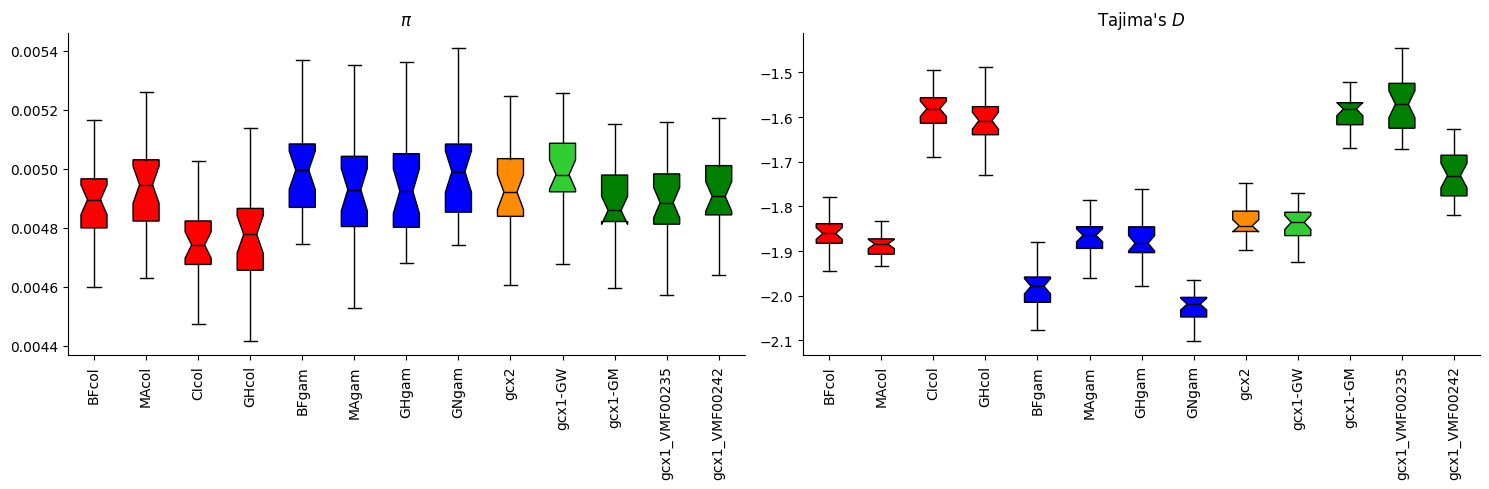

In [51]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

boxplot = ax1.boxplot(df_pi2,
                      vert=True,
                      patch_artist=True,
                      showfliers=False,
                      medianprops={"color": "black"},
                      notch=True)  # Add notches
ax1.set_title(r'$\pi$')
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_xticks(range(1, len(labels) + 1))  # Set tick positions
ax1.set_xticklabels(labels, rotation=90)  # Set tick labels

boxplot2 = ax2.boxplot(df_tjd2,
                       vert=True,
                       patch_artist=True,
                       showfliers=False,
                      medianprops={"color": "black"},
                       notch=True)  # Add notches
ax2.set_title(r"Tajima's $D$")
for patch, color in zip(boxplot2['boxes'], colors):
    patch.set_facecolor(color)
ax2.set_xticks(range(1, len(labels) + 1))  # Set tick positions
ax2.set_xticklabels(labels, rotation=90)  # Set tick labels


fig.tight_layout()
sns.despine()
plt.show()
fig.savefig('stats_pi_tjd39.png')
